
<a id='permanent-income-dles'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>


<a id='index-0'></a>

# Permanent Income Model using the DLE class

## Contents

- [Permanent Income Model using the DLE class](#Permanent-Income-Model-using-the-DLE-class)  
  - [The Permanent Income Model](#The-Permanent-Income-Model)  

**Co-author:** Sebastian Graves

This lecture is part of a suite of lectures that use the quantecon DLE class to instantiate models within the
[[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) class of models described in detail in [Recursive Models of Dynamic Linear Economies](https://lectures.quantecon.org/py/hs_recursive_models.html)

In addition to what’s included in  Anaconda, this lecture uses the quantecon  library

In [1]:
!pip install quantecon

This lecture adds a third solution method for the
linear-quadratic-Gaussian permanent income model with
$ \beta R = 1 $, complementing the other two solution methods described in in
[Optimal Savings I: The Permanent Income Model](https://lectures.quantecon.org/py/perm_income.html) and
[Optimal Savings II: LQ Techniques](https://lectures.quantecon.org/py/perm_income_cons.html) and this Jupyter
notebook [http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/permanent_income.ipynb](http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/permanent_income.ipynb)

The additional solution method uses the **DLE** class

In this way, we  map the permanent
income model into the framework of Hansen & Sargent (2013) “Recursive
Models of Dynamic Linear Economies” [[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013)

We’ll also require the following imports

In [2]:
import quantecon as qe
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt
from quantecon import DLE

%matplotlib inline
np.set_printoptions(suppress=True, precision=4)

## The Permanent Income Model

The LQ permanent income model is an example of a **savings problem**

A consumer has preferences over consumption streams that are ordered by
the utility functional


<a id='equation-perm-utility'></a>
$$
E_0 \sum_{t=0}^\infty \beta^t u(c_t) \tag{1}
$$

where $ E_t $ is the mathematical expectation conditioned on the
consumer’s time $ t $ information, $ c_t $ is time $ t $
consumption, $ u(c) $ is a strictly concave one-period utility
function, and $ \beta \in (0,1) $ is a discount factor

The LQ model gets its name partly from assuming that the utility
function $ u $ is quadratic:

$$
u(c) = -.5(c - \gamma)^2
$$

where $ \gamma>0 $ is a bliss level of consumption

The consumer maximizes the utility functional [(1)](#equation-perm-utility) by choosing a
consumption, borrowing plan $ \{c_t, b_{t+1}\}_{t=0}^\infty $
subject to the sequence of budget constraints


<a id='equation-max-utility'></a>
$$
c_t + b_t = R^{-1} b_{t+1}  + y_t, t \geq 0 \tag{2}
$$

where $ y_t $ is an exogenous stationary endowment process,
$ R $ is a constant gross risk-free interest rate, $ b_t $ is
one-period risk-free debt maturing at $ t $, and $ b_0 $ is a
given initial condition

We shall assume that $ R^{-1} = \beta $

Equation [(2)](#equation-max-utility) is linear

We use another set of linear equations to model the endowment process

In particular, we assume that the endowment process has the state-space
representation


<a id='equation-endowment'></a>
$$
\eqalign{ z_{t+1} & = A_{22} z_t + C_2 w_{t+1}  \cr
              y_t & = U_y  z_t  \cr} \tag{3}
$$

where $ w_{t+1} $ is an i.i.d. process with mean zero and identity
contemporaneous covariance matrix, $ A_{22} $ is a stable matrix,
its eigenvalues being strictly below unity in modulus, and $ U_y $
is a selection vector that identifies $ y $ with a particular linear
combination of the $ z_t $

We impose the following condition on the consumption, borrowing plan:


<a id='equation-contraint'></a>
$$
E_0 \sum_{t=0}^\infty \beta^t b_t^2 < +\infty \tag{4}
$$

This condition suffices to rule out Ponzi schemes

(We impose this condition to rule out a borrow-more-and-more plan that
would allow the household to enjoy bliss consumption forever)

The state vector confronting the household at $ t $ is

$$
x_t = \left[\matrix{z_t \cr b_t\cr}\right]
$$

where $ b_t $ is its one-period debt falling due at the beginning of
period $ t $ and $ z_t $ contains all variables useful for
forecasting its future endowment

We assume that $ \{y_t\} $ follows a second order univariate
autoregressive process:

$$
y_{t+1} = \alpha + \rho_1 y_t + \rho_2 y_{t-1} + \sigma w_{t+1}
$$

### Solution with the DLE Class

One way of solving this model is to map the problem into the framework
outlined in Section 4.8 of [[HS13b]](https://lectures.quantecon.org/py/zreferences.html#hs2013) by setting up our technology,
information and preference matrices as follows:

**Technology:**
$ \phi_c=  \left[ {\begin{array}{c}  1 \\ 0  \end{array} }  \right] $
,
$ \phi_g=  \left[ {\begin{array}{c}  0 \\ 1  \end{array} }  \right] $
,
$ \phi_i=  \left[ {\begin{array}{c}  -1 \\ -0.00001  \end{array} }  \right] $,
$ \Gamma=  \left[ {\begin{array}{c}  -1 \\ 0  \end{array} }  \right] $,
$ \Delta_k = 0 $,  $ \Theta_k = R $

**Information:**
$ A_{22} = \left[ {\begin{array}{ccc}  1 & 0 & 0 \\ \alpha & \rho_1 & \rho_2 \\ 0 & 1 & 0  \end{array} }  \right] $,
$ C_{2} = \left[ {\begin{array}{c}  0 \\ \sigma \\ 0  \end{array} }  \right] $,
$ U_b = \left[ {\begin{array}{ccc}  \gamma & 0 & 0  \end{array} }  \right] $,
$ U_d = \left[ {\begin{array}{ccc}  0 & 1 & 0 \\ 0 & 0 & 0  \end{array} }  \right] $

**Preferences:** $ \Lambda = 0 $, $ \Pi = 1 $,
$ \Delta_h = 0 $, $ \Theta_h = 0 $

We set parameters

$ \alpha = 10, \beta = 0.95, \rho_1 = 0.9, \rho_2 = 0, \sigma = 1 $

(The value of $ \gamma $ does not affect the optimal decision rule)

The chosen matrices mean that the household’s technology is:

$$
c_t + k_{t-1} = i_t + y_t
$$

$$
\frac{k_t}{R} = i_t
$$

$$
l_t^2 = (0.00001)^2i_t
$$

Combining the first two of these gives the budget constraint of the
permanent income model, where $ k_t = b_{t+1} $

The third equation is a very small penalty on debt-accumulation to rule
out Ponzi schemes

We set up this instance of the DLE class below:

In [3]:
α, β, ρ_1, ρ_2, σ = 10, 0.95, 0.9, 0, 1

γ = np.array([[-1], [0]])
ϕ_c = np.array([[1], [0]])
ϕ_g = np.array([[0], [1]])
ϕ_1 = 1e-5
ϕ_i = np.array([[-1], [-ϕ_1]])
δ_k = np.array([[0]])
θ_k = np.array([[1 / β]])
β = np.array([[β]])
l_λ = np.array([[0]])
π_h = np.array([[1]])
δ_h = np.array([[0]])
θ_h = np.array([[0]])

a22 = np.array([[1,   0,   0],
                [α, ρ_1, ρ_2],
                [0, 1, 0]])

c2 = np.array([[0], [σ], [0]])
ud = np.array([[0, 1, 0],
               [0, 0, 0]])
ub = np.array([[100, 0, 0]])

x0 = np.array([[0], [0], [1], [0], [0]])

Info1 = (a22, c2, ub, ud)
Tech1 = (ϕ_c, ϕ_g, ϕ_i, γ, δ_k, θ_k)
Pref1 = (β, l_λ, π_h, δ_h, θ_h)
Econ1 = DLE(Info1, Tech1, Pref1)

To check the solution of this model with that from the **LQ** problem,
we select the $ S_c $ matrix from the DLE class

The solution to the
DLE economy has:

$$
c_t = S_c x_t
$$

In [4]:
Econ1.Sc

array([[ 0.    , -0.05  , 65.5172,  0.3448,  0.    ]])

The state vector in the DLE class is:

$$
x_t = \left[ {\begin{array}{c}
 h_{t-1} \\ k_{t-1} \\ z_t
 \end{array} }
 \right]
$$

where $ k_{t-1} $ = $ b_{t} $ is set up to be $ b_t $ in the
permanent income model

The state vector in the LQ problem is
$ \left[\matrix{z_t \cr b_t\cr}\right] $

Consequently, the relevant elements of Econ1.Sc are the same as in
$ -F $ occur when we apply other approaches to the same model in the lecture
[Optimal Savings II: LQ Techniques](https://lectures.quantecon.org/py/perm_income_cons.html) and this Jupyter
notebook [http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/permanent_income.ipynb](http://nbviewer.jupyter.org/github/QuantEcon/QuantEcon.notebooks/blob/master/permanent_income.ipynb)

The plot below quickly replicates the first two figures of
that that lecture and that  notebook to confirm that the solutions are the same

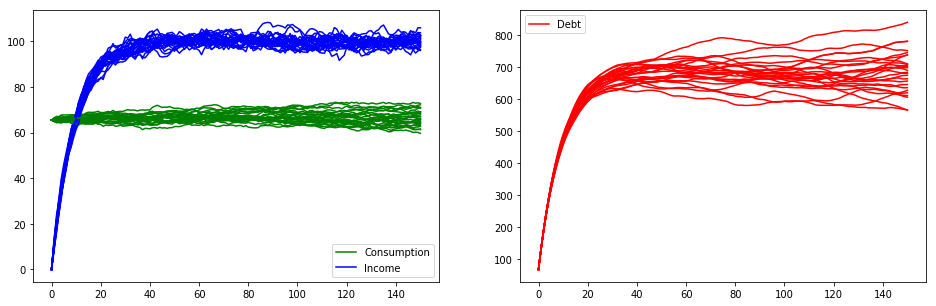

In [5]:
plt.figure(figsize=(16, 5))
plt.subplot(121)

for i in range(25):
    Econ1.compute_sequence(x0, ts_length=150)
    plt.plot(Econ1.c[0], c='g')
    plt.plot(Econ1.d[0], c='b')
plt.plot(Econ1.c[0], label='Consumption', c='g')
plt.plot(Econ1.d[0], label='Income', c='b')
plt.legend()

plt.subplot(122)
for i in range(25):
    Econ1.compute_sequence(x0, ts_length=150)
    plt.plot(Econ1.k[0], color='r')
plt.plot(Econ1.k[0], label='Debt', c='r')
plt.legend()
plt.show()